In [1]:
# We will import all the required packages for data cleaning process
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
houseDf = pd.read_csv(r"D:\Great_Learning_MTech\Jupyter_notebooks\Kaggle Notebooks\Kaggle\House Predictions\archive\house_price.csv")
houseDf.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
# check for null values
houseDf.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
# We will drop the id, date, zipcode, lat and long columns as well will not be using them in the prediction
houseDf.drop(columns=['id', 'date', 'zipcode', 'lat', 'long'], inplace=True)

In [7]:
# We will recode the 33 bedrooms to 3, as it appears to a entry error
houseDf[houseDf['bedrooms'] == 33]
houseDf['bedrooms'].replace({33: 3}, inplace=True)

In [8]:
# There cannot be a house with out a bathroom. Lets check how many entries are there with bathroom value as 0
houseDf[houseDf['bathrooms'] == 0]
houseDf = houseDf[houseDf['bathrooms'] != 0] # droping the rows with bathroom value 0

In [9]:
# Calculating the age of the house with 2017 has the fixed as this is a data taken back in 2017
houseDf['Age'] = 2017 - houseDf['yr_built']

In [10]:
# Create a new flag called renovated or not
houseDf['Renovated'] = [1 if i != 0 else 0 for i in houseDf['yr_renovated']]

### Outlier detection and treatment 

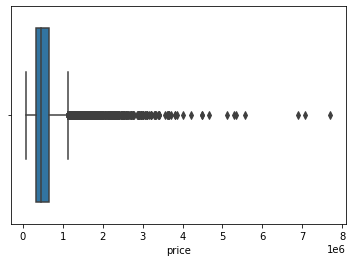

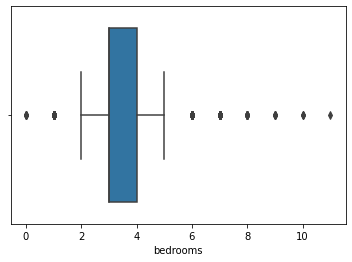

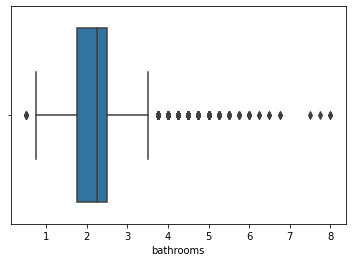

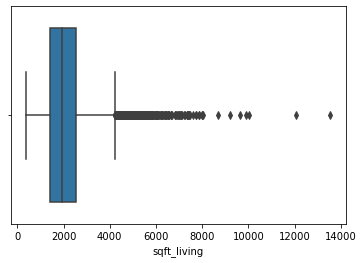

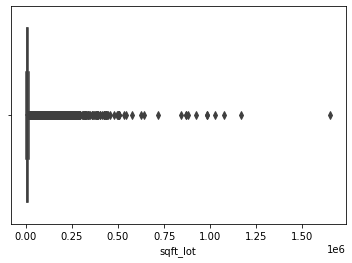

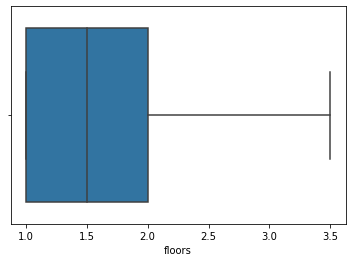

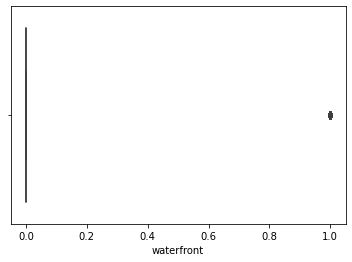

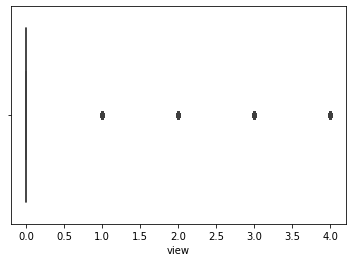

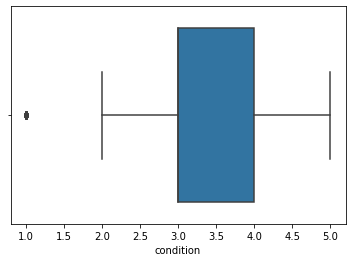

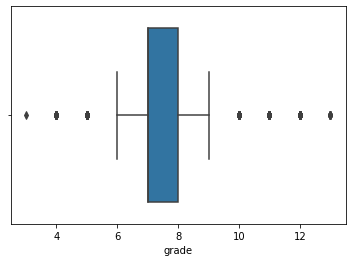

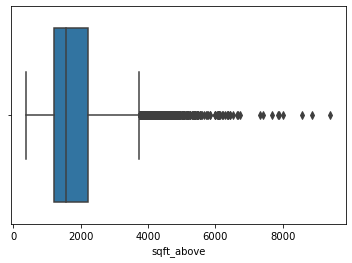

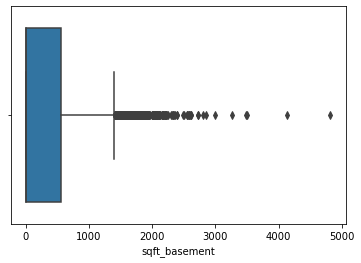

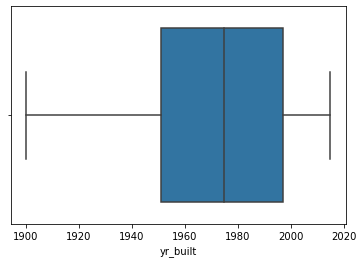

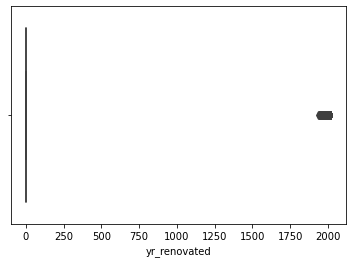

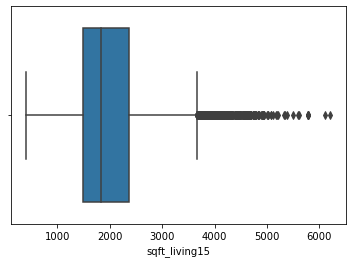

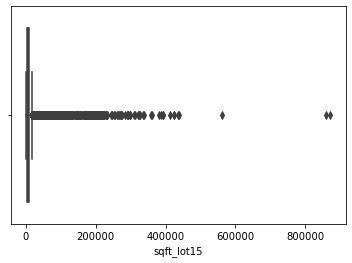

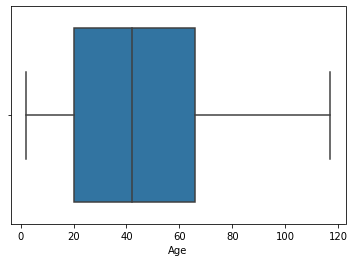

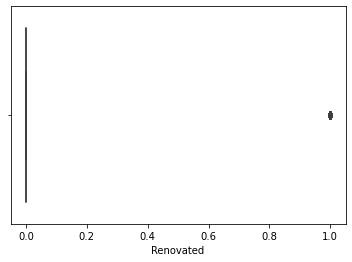

In [11]:
for i in houseDf.columns:
    sns.boxplot(houseDf[i])
    plt.show()

In [12]:
houseDf.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15', 'Age', 'Renovated'],
      dtype='object')

In [13]:
# We will be first checking the percentage of outlier in the below mentioned columns:
columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']

def findOutlierPercentage(column, dataLength):
    q3 = houseDf[column].quantile(0.75)
    q1 = houseDf[column].quantile(0.25)
    
    IQR = q3 - q1
    
    ub = q3 + (1.5 * IQR)
    lb = q1 + (1.5 * IQR)
    
    data_outlier = houseDf[(houseDf[column] < lb) | (houseDf[column] > ub)]
    percentage = (len(data_outlier)/dataLength) * 100
    print("Percentage of outlier in {0} is : {1:0f}".format(column, percentage))

In [14]:
df_length = len(houseDf)
for i in columns:
    findOutlierPercentage(i, df_length)

Percentage of outlier in sqft_living is : 90.205064
Percentage of outlier in sqft_lot is : 94.209138
Percentage of outlier in sqft_above is : 89.279267
Percentage of outlier in sqft_basement is : 87.862797
Percentage of outlier in sqft_living15 is : 89.913438
Percentage of outlier in sqft_lot15 is : 94.380410


<AxesSubplot:>

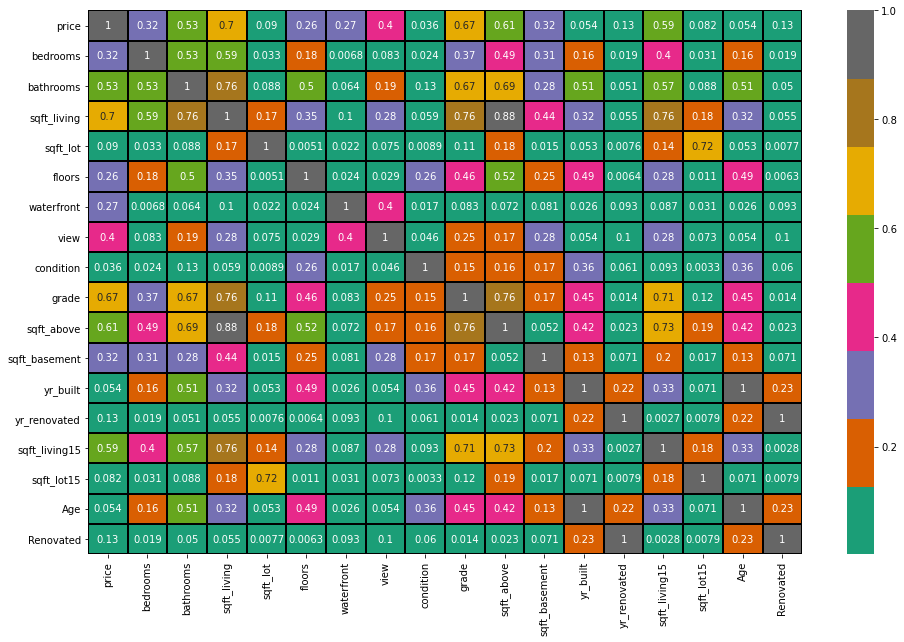

In [16]:
# Finding the correlation
plt.figure(figsize=(16,10))
sns.heatmap(np.abs(houseDf.corr()), cmap='Dark2', annot=True, linewidths=1.0, linecolor='black')

In [36]:
# We will create the OLS model and verify if it satisfies all the assumptions

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
target_column = 'price'
input_col = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15']

train_x, test_x, train_y, test_y = train_test_split(houseDf[input_col], houseDf[target_column], test_size=0.2, random_state=1)

In [35]:
standardScaler = StandardScaler().fit(train_x)
train_x_scaled = pd.DataFrame(standardScaler.transform(train_x), columns=train_x.columns, index=train_x.index)
test_x_scaled = pd.DataFrame(standardScaler.transform(test_x), columns=test_x.columns, index=test_x.index)

In [37]:
model = LinearRegression().fit(train_x_scaled, train_y)

In [40]:
# Model class creation
class HousePricePrediction:
    def __init__(self, train_x, train_y):
        self.train_x = train_x
        self.train_y = train_y
    
    def fit(self):
        self.scaler = StandardScaler().fit(self.train_x)
        train_x_scaled = self.scale()
        self.model = LinearRegression().fit(train_x_scaled.values, self.train_y)
        return self
        
    def scale(self, data=None):
        if data is None:
            data = self.train_x
        scaler = self.scaler
        data_scaled = scaler.transform(data)
        df_scaled_data = pd.DataFrame(data_scaled, columns=data.columns, index=data.index)
        return df_scaled_data

In [41]:
target_column = 'price'
input_col = ['bedrooms', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_living15']

train_x, test_x, train_y, test_y = train_test_split(houseDf[input_col], houseDf[target_column], test_size=0.2, random_state=1)
model_obj = HousePricePrediction(train_x, train_y).fit()

In [42]:
import joblib
joblib.dump(model_obj, 'housePricePrediction.joblib') # To save the pre-trained model to the local disk

['housePricePrediction.joblib']